In [45]:
! pip install kaggle

In [46]:
!kaggle datasets download kazanova/sentiment140 -f training.1600000.processed.noemoticon.csv

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
training.1600000.processed.noemoticon.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
import zipfile
zip = zipfile.ZipFile('training.1600000.processed.noemoticon.csv.zip')
zip.extractall()
zip.close()

In [48]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
#printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

data processing

In [51]:
#loading data from csv to pandas dataframe
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')

In [52]:
twitter_data.shape

(1599999, 6)

In [53]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [54]:
column_names=['target','id','date','flag','user','text']
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names=column_names,encoding='ISO-8859-1')

In [55]:
twitter_data.shape

(1600000, 6)

In [56]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [57]:
twitter_data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [58]:
#checking target column
twitter_data['target'].value_counts()

,count
target,
0,800000
4,800000


In [59]:
#convert 4 to 1
twitter_data.replace({'target':{4:1}},inplace=True)

In [60]:
twitter_data['target'].value_counts()

,count
target,
0,800000
1,800000


0--->negative tweets
1--->positive tweet

stemming is the process of reducing a word to its root word


In [61]:
port_stem=PorterStemmer()

In [62]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

  return stemmed_content

In [19]:
twitter_data['stemmed_content']=twitter_data['text'].apply(stemming)

In [20]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, http, twitpic, com, zl, awww, bum..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, updat, facebook, text, might, cri, res..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[kenichan, dive, mani, time, ball, manag, save..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behav, mad, see]"


In [21]:
print(twitter_data['stemmed_content'])

0          [switchfoot, http, twitpic, com, zl, awww, bum...
1          [upset, updat, facebook, text, might, cri, res...
2          [kenichan, dive, mani, time, ball, manag, save...
3                     [whole, bodi, feel, itchi, like, fire]
4                         [nationwideclass, behav, mad, see]
                                 ...                        
1599995                     [woke, school, best, feel, ever]
1599996    [thewdb, com, cool, hear, old, walt, interview...
1599997                   [readi, mojo, makeov, ask, detail]
1599998    [happi, th, birthday, boo, alll, time, tupac, ...
1599999    [happi, charitytuesday, thenspcc, sparkschar, ...
Name: stemmed_content, Length: 1600000, dtype: object


In [22]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [23]:
#seperating the data and label
X=twitter_data['stemmed_content'].values
Y=twitter_data['target'].values

In [24]:
print(X)

[list(['switchfoot', 'http', 'twitpic', 'com', 'zl', 'awww', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day'])
 list(['upset', 'updat', 'facebook', 'text', 'might', 'cri', 'result', 'school', 'today', 'also', 'blah'])
 list(['kenichan', 'dive', 'mani', 'time', 'ball', 'manag', 'save', 'rest', 'go', 'bound'])
 ... list(['readi', 'mojo', 'makeov', 'ask', 'detail'])
 list(['happi', 'th', 'birthday', 'boo', 'alll', 'time', 'tupac', 'amaru', 'shakur'])
 list(['happi', 'charitytuesday', 'thenspcc', 'sparkschar', 'speakinguph', 'h'])]


In [25]:
print(Y)

[0 0 0 ... 1 1 1]


splitting the data to training data and splitting data

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [28]:
print(X_train)

[list(['watch', 'saw', 'iv', 'drink', 'lil', 'wine'])
 list(['hatermagazin'])
 list(['even', 'though', 'favourit', 'drink', 'think', 'vodka', 'coke', 'wipe', 'mind', 'time', 'think', 'im', 'gonna', 'find', 'new', 'drink'])
 ... list(['eager', 'monday', 'afternoon'])
 list(['hope', 'everyon', 'mother', 'great', 'day', 'wait', 'hear', 'guy', 'store', 'tomorrow'])
 list(['love', 'wake', 'folger', 'bad', 'voic', 'deeper'])]


In [29]:
print(X_test)

[list(['mmangen', 'fine', 'much', 'time', 'chat', 'twitter', 'hubbi', 'back', 'summer', 'amp', 'tend', 'domin', 'free', 'time'])
 list(['ah', 'may', 'show', 'w', 'ruth', 'kim', 'amp', 'geoffrey', 'sanhueza'])
 list(['ishatara', 'mayb', 'bay', 'area', 'thang', 'dammit']) ...
 list(['destini', 'nevertheless', 'hooray', 'member', 'wonder', 'safe', 'trip'])
 list(['feel', 'well']) list(['supersandro', 'thank'])]


In [30]:
#converting textual data to numerical data
# If X_train is a list of lists, you might need to join the inner lists into strings
X_train = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_train]
X_test = [' '.join(doc) if isinstance(doc, list) else doc for doc in X_test]

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [36]:
print('Accuracy score on the training data:',training_data_accuracy)

Accuracy score on the training data: 0.79871953125


In [ ]:
#saving trained model
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#using saved model for future prediction
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [42]:
X_new=X_test[200]
print(Y_test[200])
prediction=model.predict(X_new)
print()
if(prediction[0]==0):
  print('Negative Tweet')
else:
  print('positive Tweet')

1

positive Tweet


In [43]:
X_new=X_test[3]
print(Y_test[3])
prediction=model.predict(X_new)
print()
if(prediction[0]==0):
  print('Negative Tweet')
else:
  print('positive Tweet')

0

Negative Tweet


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

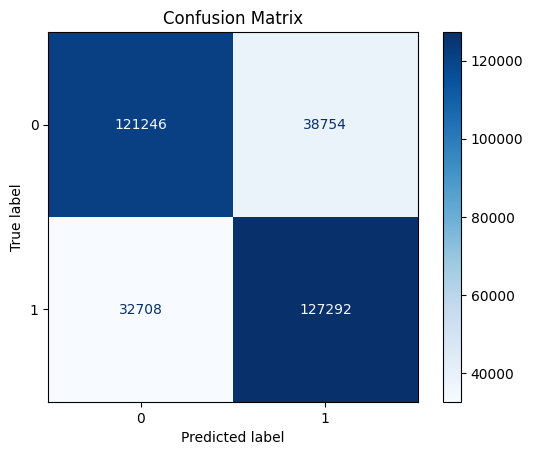

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: Assuming `y_test` are the true labels and `y_pred` are the predictions
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-72-629999a56503>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(top_features['feature'], top_features['importance'], linefmt='-', markerfmt='o', basefmt=" ", use_line_collection=True)


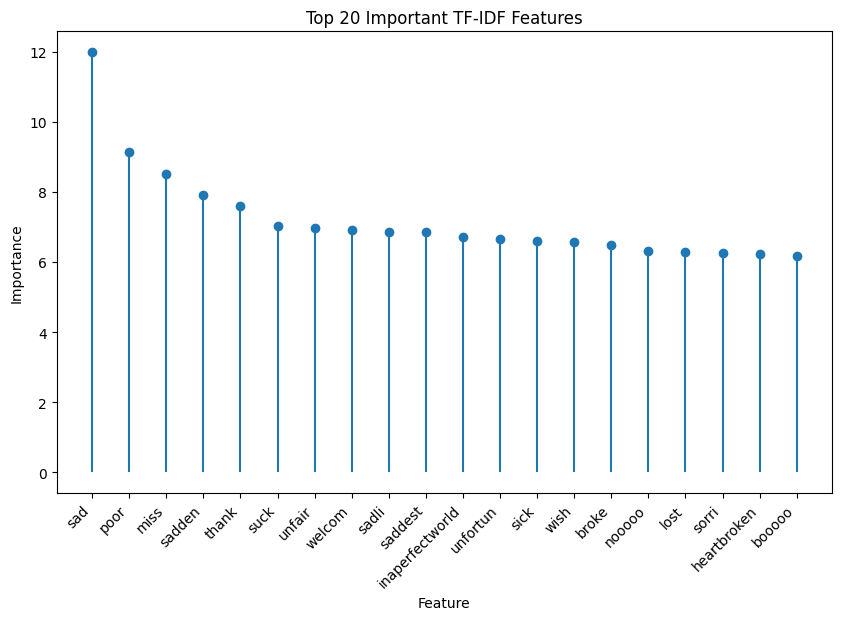

In [72]:
plt.figure(figsize=(10, 6))
plt.stem(top_features['feature'], top_features['importance'], linefmt='-', markerfmt='o', basefmt=" ", use_line_collection=True)
plt.title('Top 20 Important TF-IDF Features')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


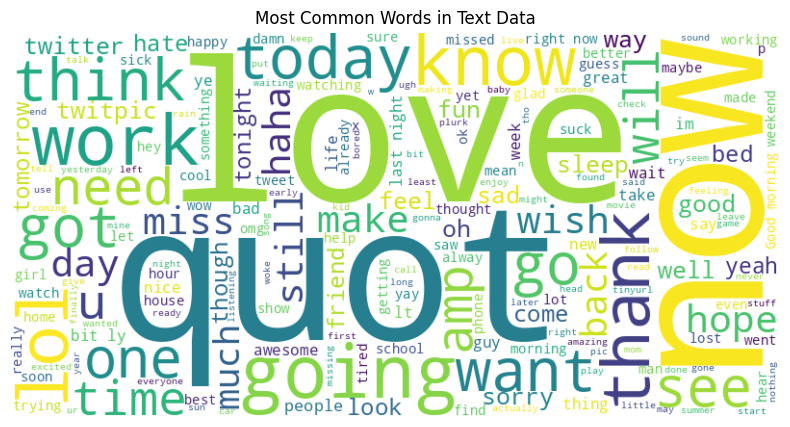

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example: Assuming 'text' is the column with text data
# Combine all text for visualization
all_words = ' '.join(twitter_data['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text Data')
plt.show()

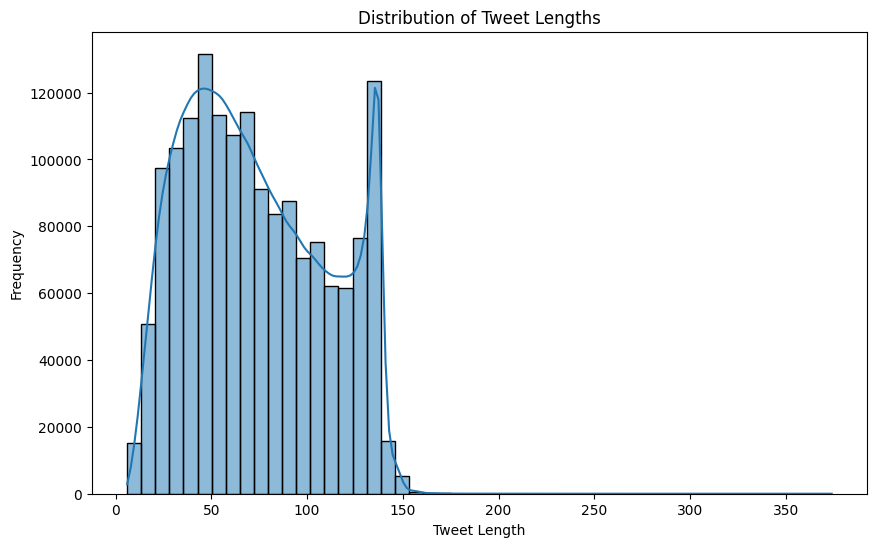

In [77]:

# Visualize the distribution of tweet lengths
twitter_data['tweet_length'] = twitter_data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(twitter_data['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()





<ipython-input-70-4fd48493bd81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


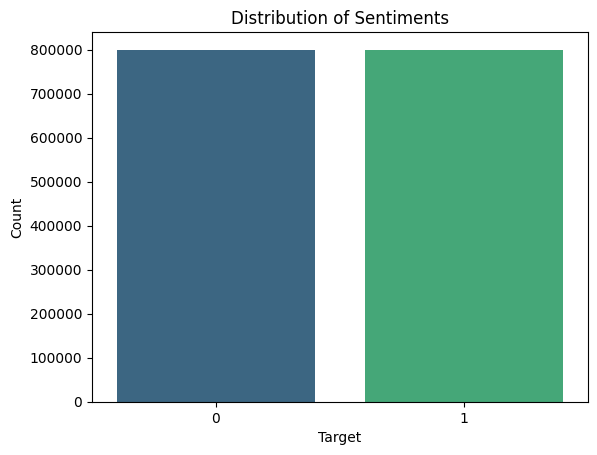

In [70]:
# Create a bar chart
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()